In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/Users/rachellehorwitz/Documents/ViTalErt/data/filtered05/vitalPeriodic_heartrate.csv')

In [5]:
data.head()

,vitalperiodicid,patientunitstayid,observationoffset,heartrate
0,37376747,141168,2059,92.0
1,37404957,141168,1289,118.0
2,37385871,141168,1794,78.0
3,37401664,141168,1374,118.0
4,37377404,141168,2039,92.0


In [7]:
data = data[~data['heartrate'].isnull()]

In [8]:
data.shape

(133600433, 4)

In [9]:
data_first24 = data[data['observationoffset']<24*60]

In [10]:
data_first24.shape[0]

39997343

In [19]:
hrtoobig = data_first24[data_first24['heartrate']< 5]
hrtoobig.shape[0]

5481

In [20]:
# Compute mean HR during first 24 hours for each patient
hr_first24 = data_first24.groupby('patientunitstayid')['heartrate'].mean()

In [22]:
hr_first24.shape[0]

158784

In [23]:
hr_first24[hr_first24.isnull()]

Series([], Name: heartrate, dtype: float64)

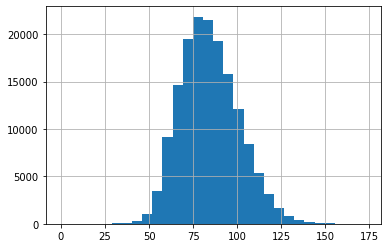

In [25]:
hr_first24.hist(bins=30)

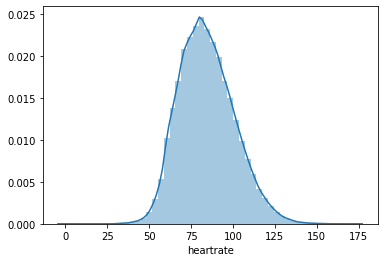

In [28]:
sns.distplot(hr_first24)

In [30]:
hr_first24.to_csv('/Users/rachellehorwitz/Documents/ViTalErt/data/filtered05/vitalPeriodic_heartrate_first24.csv', \
                 index=False)